<a href="https://colab.research.google.com/github/rohithp29/Data-Science-Project/blob/main/Task_4__Cluster_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ADDING NECESSARY LIBRARIES

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

IMPORTING THE DATASET

In [19]:
df=pd.read_csv("Housing.csv")

In [20]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [21]:
df.describe()


,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


CHECKING FOR MISSING VALUES / NULL VALUES

In [37]:
df.isnull().sum()

,0
price,0
area,0
bedrooms,0
bathrooms,0
stories,0
mainroad,0
guestroom,0
basement,0
hotwaterheating,0
airconditioning,0


REMOVING THE NULL VALUES

In [38]:
df.dropna()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,0.396564,0.6,0.333333,0.666667,1,0,0,0,1,0.666667,1,False,False
1,12250000,0.502405,0.6,1.000000,1.000000,1,0,0,0,1,1.000000,0,False,False
2,12250000,0.571134,0.4,0.333333,0.333333,1,0,1,0,0,0.666667,1,True,False
3,12215000,0.402062,0.6,0.333333,0.333333,1,0,1,0,1,1.000000,1,False,False
4,11410000,0.396564,0.6,0.000000,0.333333,1,1,1,0,1,0.666667,0,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,0.092784,0.2,0.000000,0.000000,1,0,1,0,0,0.666667,0,False,True
541,1767150,0.051546,0.4,0.000000,0.000000,0,0,0,0,0,0.000000,0,True,False
542,1750000,0.135395,0.2,0.000000,0.000000,1,0,0,0,0,0.000000,0,False,True
543,1750000,0.086598,0.4,0.000000,0.000000,0,0,0,0,0,0.000000,0,False,False


HISTOGRAM OF NUMERICAL FEATURES

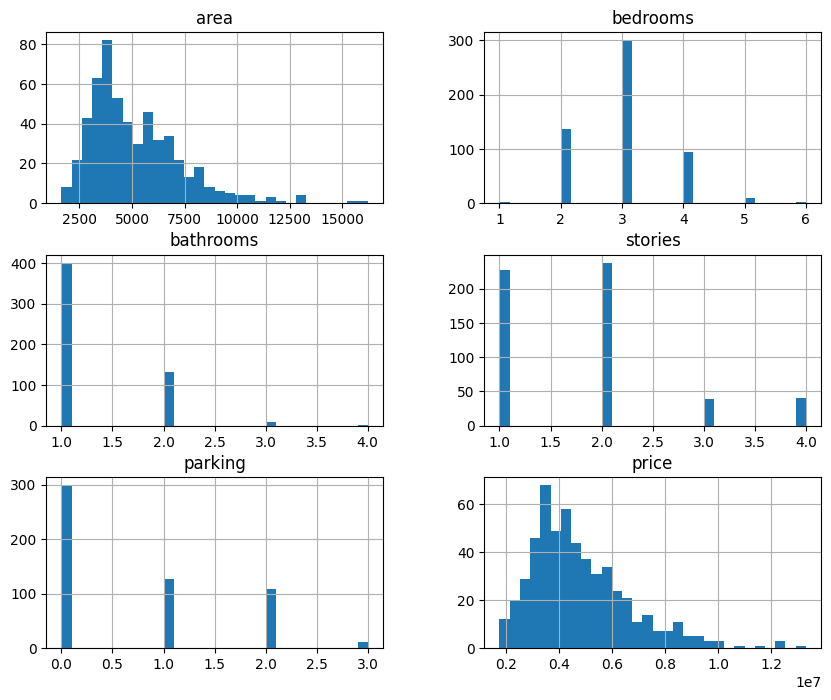

In [26]:
numerical_cols = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking', 'price']
df[numerical_cols].hist(figsize=(10, 8), bins=30)
plt.show()

BOXPLOT FOR OUTLIER DETECTION

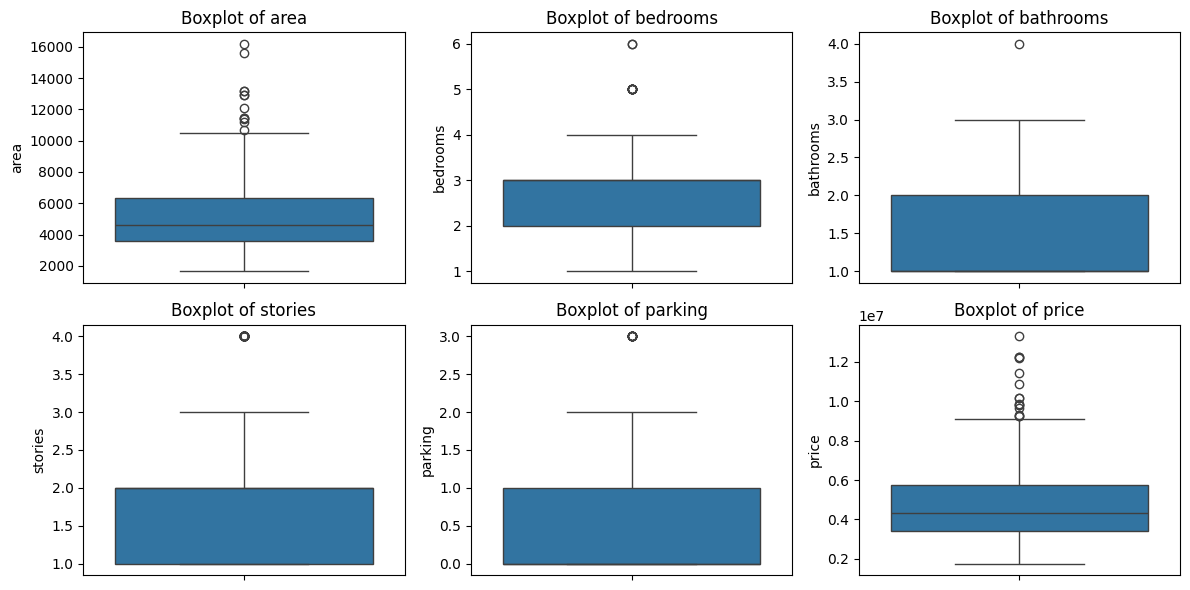

In [27]:
plt.figure(figsize=(12, 6))
for i, col in enumerate(numerical_cols):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

Encoding Categorical Binary Variables

In [28]:
df['mainroad'] = df['mainroad'].map({'yes': 1, 'no': 0})
df['guestroom'] = df['guestroom'].map({'yes': 1, 'no': 0})
df['basement'] = df['basement'].map({'yes': 1, 'no': 0})
df['hotwaterheating'] = df['hotwaterheating'].map({'yes': 1, 'no': 0})
df['airconditioning'] = df['airconditioning'].map({'yes': 1, 'no': 0})
df['prefarea'] = df['prefarea'].map({'yes': 1, 'no': 0})


In [29]:
df = pd.get_dummies(df, columns=['furnishingstatus'], drop_first=True)

Feature Scaling using Min-Max Scaling

In [30]:
scaler = MinMaxScaler()
df[['area', 'bedrooms', 'bathrooms', 'stories', 'parking']] = scaler.fit_transform(df[['area', 'bedrooms', 'bathrooms', 'stories', 'parking']])


Correlation Heatmap

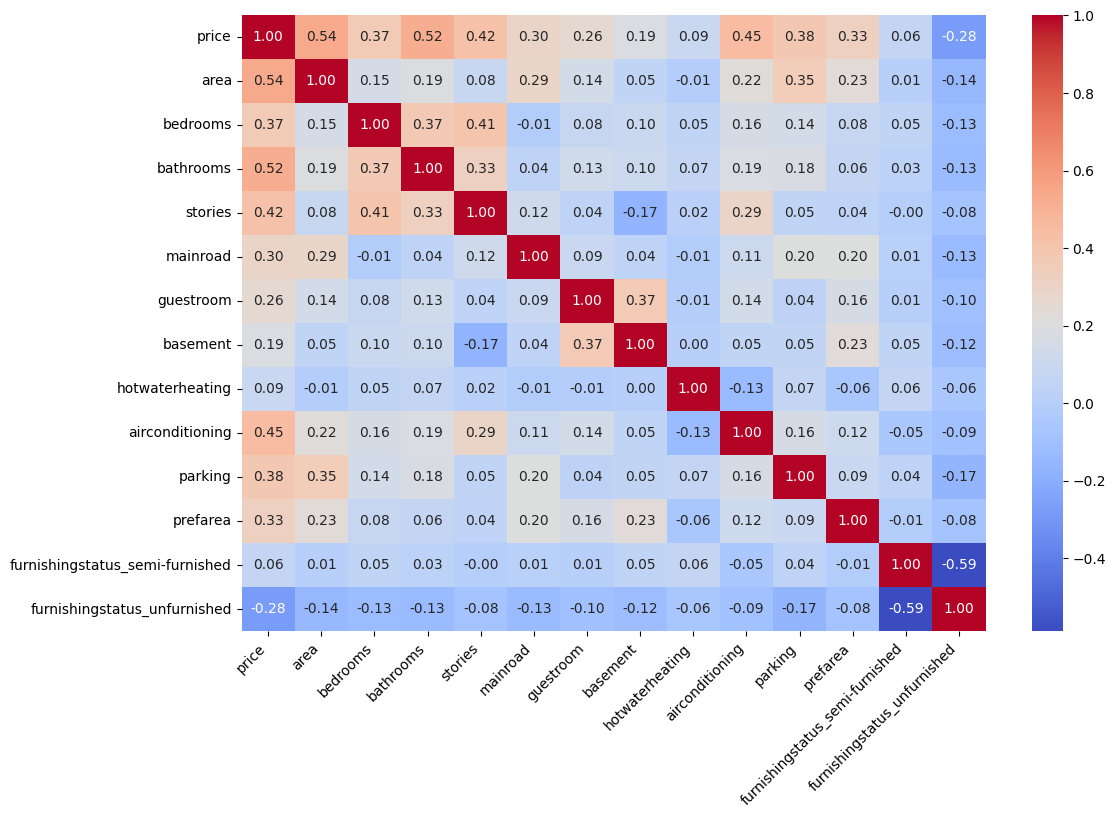

In [32]:
corr_matrix = df.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

plt.show()


Splitting Data into Training and Testing Sets

In [33]:
X = df.drop(columns=['price'])
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Training a Linear Regression Model

In [34]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

Evaluating the Model Performance

In [35]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print(f'RMSE: {rmse}')
print(f'R² Score: {r2}')


RMSE: 1324506.960091441
R² Score: 0.6529242642153172
